Chapter 25
# 基于鸢尾花数据个各种距离度量等高线
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_iris
from sklearn.covariance import EmpiricalCovariance, MinCovDet
from numpy import linalg as LA

import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

## 导入数据

In [2]:
iris_sns = sns.load_dataset("iris") 

SIGMA = iris_sns.cov()
CORR = iris_sns.corr()
SIGMA = np.array(SIGMA)
CORR = np.array(CORR)

# plt.close('all')
SIGMA_13 = SIGMA[[0,2], :][:, [0,2]]
CORR_13  = CORR[[0,2], :][:, [0,2]]
sigma_x = iris_sns['sepal_length'].std()
sigma_y = iris_sns['petal_length'].std()
cov_xy = SIGMA_13[0,1]

mu_x = iris_sns['sepal_length'].mean()
mu_y = iris_sns['petal_length'].mean()

x = np.linspace(3,9,num = 201)
y = np.linspace(1,7,num = 201)
xx,yy = np.meshgrid(x,y)

C:\Users\james\AppData\Local\Temp\ipykernel_5864\4038697536.py:4: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  SIGMA = iris_sns.cov()
C:\Users\james\AppData\Local\Temp\ipykernel_5864\4038697536.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  CORR = iris_sns.corr()


## 自定函数产生旋转网格

In [3]:
def generate_grid(V, mu_x, mu_y):
    # grid rotation
    x1_grid = np.arange(-10, 10 + 1, step=1);
    x2_grid = np.arange(-10, 10 + 1, step=1);
    
    XX1_grid,XX2_grid = np.meshgrid(x1_grid,x2_grid);
    
    X_grid = np.column_stack((XX1_grid.ravel(),XX2_grid.ravel()))
    
    Z_grid = X_grid@V.T;
    
    ZZ1_grid = Z_grid[:,0].reshape((len(x1_grid), len(x2_grid)))
    ZZ2_grid = Z_grid[:,1].reshape((len(x1_grid), len(x2_grid)))
    
    # translate centroid
    ZZ1_grid = ZZ1_grid + mu_x 
    ZZ2_grid = ZZ2_grid + mu_y
    
    return ZZ1_grid, ZZ2_grid

## 欧氏距离

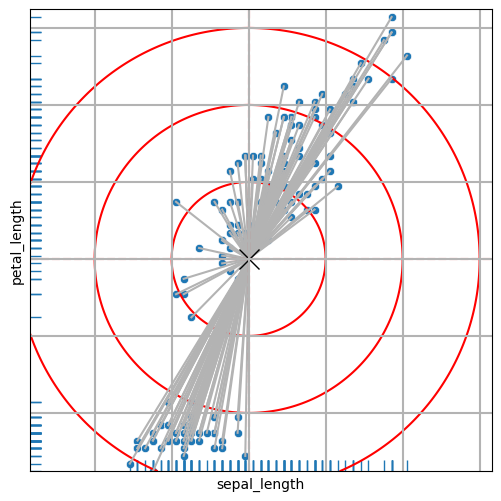

In [4]:
I = np.array([[1, 0],
              [0, 1]])

ZZ1_grid, ZZ2_grid = generate_grid(I, mu_x, mu_y)

x_array = np.array(iris_sns["sepal_length"])
y_array = np.array(iris_sns["petal_length"])

fig, ax = plt.subplots(figsize = (6,6))

plt.plot([x_array, mu_x+x_array*0],
         [y_array, mu_y+y_array*0], 
         color = [0.7,0.7,0.7])

ax = sns.scatterplot(data=iris_sns, x="sepal_length", y="petal_length")
sns.rugplot(data=iris_sns, x="sepal_length", y="petal_length", ax = ax)

plt.axvline(x=mu_x, linestyle = '--', color = 'r')
plt.axhline(y=mu_y, linestyle = '--', color = 'r')

plt.plot(mu_x,mu_y, color = 'k', 
         marker = 'x', markersize = 15)

# ax.set_xlabel('Sepal length, $x_1$ (cm)')
# ax.set_ylabel('Petal length, $x_3$ (cm)')

ax.set_xticks([])
ax.set_yticks([])

plt.plot(ZZ1_grid,ZZ2_grid,color = [0.7,0.7,0.7])
plt.plot(ZZ1_grid.T,ZZ2_grid.T,color = [0.7,0.7,0.7])

ax.axis('scaled')

ax.set_xbound(3,9)

ax.set_ybound(1,7)

# Euclidean distance
dd = np.sqrt((xx - mu_x)**2 + (yy - mu_y)**2)
ax.contour(xx,yy,dd,levels = [1, 2, 3], colors = 'r')

#%% standardized Euclidean distance


D = np.array([[sigma_x, 0],
              [0, sigma_y]])

ZZ1_grid, ZZ2_grid = generate_grid(D, mu_x, mu_y)

x_array = np.array(iris_sns["sepal_length"])
y_array = np.array(iris_sns["petal_length"])

fig.savefig('Figures/鸢尾花，L2.svg', format='svg')

## L1范数

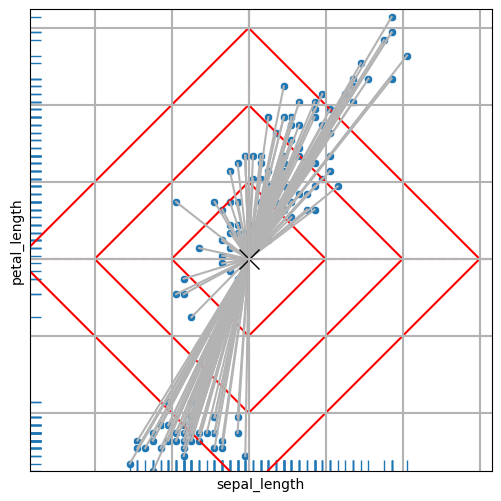

In [5]:
I = np.array([[1, 0],
              [0, 1]])

ZZ1_grid, ZZ2_grid = generate_grid(I, mu_x, mu_y)

x_array = np.array(iris_sns["sepal_length"])
y_array = np.array(iris_sns["petal_length"])

fig, ax = plt.subplots(figsize = (6,6))

plt.plot([x_array, mu_x+x_array*0],
         [y_array, mu_y+y_array*0], 
         color = [0.7,0.7,0.7])

ax = sns.scatterplot(data=iris_sns, x="sepal_length", y="petal_length")
sns.rugplot(data=iris_sns, x="sepal_length", y="petal_length", ax = ax)

plt.axvline(x=mu_x, linestyle = '--', color = 'r')
plt.axhline(y=mu_y, linestyle = '--', color = 'r')

plt.plot(mu_x,mu_y, color = 'k', 
         marker = 'x', markersize = 15)

# ax.set_xlabel('Sepal length, $x_1$ (cm)')
# ax.set_ylabel('Petal length, $x_3$ (cm)')

ax.set_xticks([])
ax.set_yticks([])

plt.plot(ZZ1_grid,ZZ2_grid,color = [0.7,0.7,0.7])
plt.plot(ZZ1_grid.T,ZZ2_grid.T,color = [0.7,0.7,0.7])

ax.axis('scaled')

ax.set_xbound(3,9)

ax.set_ybound(1,7)

# Euclidean distance
dd = np.abs(xx - mu_x) + np.abs((yy - mu_y))
ax.contour(xx,yy,dd,levels = [1, 2, 3], colors = 'r')

#%% standardized Euclidean distance


D = np.array([[sigma_x, 0],
              [0, sigma_y]])

ZZ1_grid, ZZ2_grid = generate_grid(D, mu_x, mu_y)

x_array = np.array(iris_sns["sepal_length"])
y_array = np.array(iris_sns["petal_length"])

fig.savefig('Figures/鸢尾花，L1.svg', format='svg')

## L1.5范数

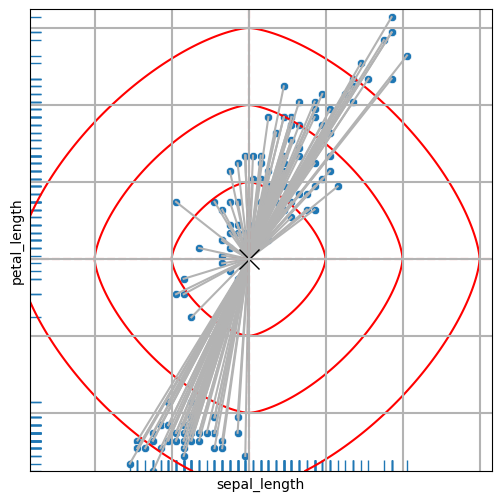

In [6]:
I = np.array([[1, 0],
              [0, 1]])

ZZ1_grid, ZZ2_grid = generate_grid(I, mu_x, mu_y)

x_array = np.array(iris_sns["sepal_length"])
y_array = np.array(iris_sns["petal_length"])

fig, ax = plt.subplots(figsize = (6,6))

plt.plot([x_array, mu_x+x_array*0],
         [y_array, mu_y+y_array*0], 
         color = [0.7,0.7,0.7])

ax = sns.scatterplot(data=iris_sns, x="sepal_length", y="petal_length")
sns.rugplot(data=iris_sns, x="sepal_length", y="petal_length", ax = ax)

plt.axvline(x=mu_x, linestyle = '--', color = 'r')
plt.axhline(y=mu_y, linestyle = '--', color = 'r')

plt.plot(mu_x,mu_y, color = 'k', 
         marker = 'x', markersize = 15)

# ax.set_xlabel('Sepal length, $x_1$ (cm)')
# ax.set_ylabel('Petal length, $x_3$ (cm)')

ax.set_xticks([])
ax.set_yticks([])

plt.plot(ZZ1_grid,ZZ2_grid,color = [0.7,0.7,0.7])
plt.plot(ZZ1_grid.T,ZZ2_grid.T,color = [0.7,0.7,0.7])

ax.axis('scaled')

ax.set_xbound(3,9)

ax.set_ybound(1,7)

# Euclidean distance
p = 1.5
dd = ((np.abs((xx - mu_x))**p) + (np.abs((yy - mu_y))**p))**(1./p)
ax.contour(xx,yy,dd,levels = [1, 2, 3], colors = 'r')

#%% standardized Euclidean distance


D = np.array([[sigma_x, 0],
              [0, sigma_y]])

ZZ1_grid, ZZ2_grid = generate_grid(D, mu_x, mu_y)

x_array = np.array(iris_sns["sepal_length"])
y_array = np.array(iris_sns["petal_length"])

fig.savefig('Figures/鸢尾花，L1.5.svg', format='svg')

## L4范数

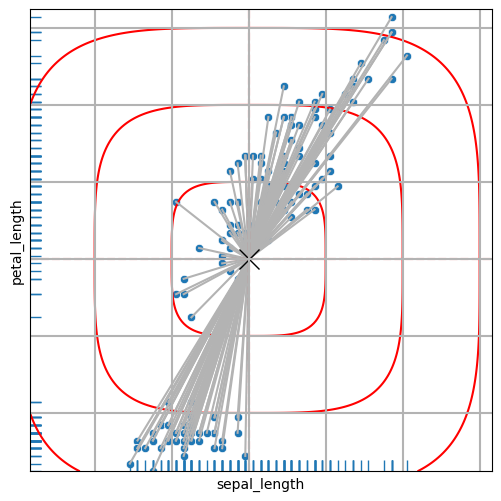

In [7]:
I = np.array([[1, 0],
              [0, 1]])

ZZ1_grid, ZZ2_grid = generate_grid(I, mu_x, mu_y)

x_array = np.array(iris_sns["sepal_length"])
y_array = np.array(iris_sns["petal_length"])

fig, ax = plt.subplots(figsize = (6,6))

plt.plot([x_array, mu_x+x_array*0],
         [y_array, mu_y+y_array*0], 
         color = [0.7,0.7,0.7])

ax = sns.scatterplot(data=iris_sns, x="sepal_length", y="petal_length")
sns.rugplot(data=iris_sns, x="sepal_length", y="petal_length", ax = ax)

plt.axvline(x=mu_x, linestyle = '--', color = 'r')
plt.axhline(y=mu_y, linestyle = '--', color = 'r')

plt.plot(mu_x,mu_y, color = 'k', 
         marker = 'x', markersize = 15)

# ax.set_xlabel('Sepal length, $x_1$ (cm)')
# ax.set_ylabel('Petal length, $x_3$ (cm)')

ax.set_xticks([])
ax.set_yticks([])

plt.plot(ZZ1_grid,ZZ2_grid,color = [0.7,0.7,0.7])
plt.plot(ZZ1_grid.T,ZZ2_grid.T,color = [0.7,0.7,0.7])

ax.axis('scaled')

ax.set_xbound(3,9)

ax.set_ybound(1,7)

# Euclidean distance
p = 4
dd = ((np.abs((xx - mu_x))**p) + (np.abs((yy - mu_y))**p))**(1./p)
ax.contour(xx,yy,dd,levels = [1, 2, 3], colors = 'r')

#%% standardized Euclidean distance


D = np.array([[sigma_x, 0],
              [0, sigma_y]])

ZZ1_grid, ZZ2_grid = generate_grid(D, mu_x, mu_y)

x_array = np.array(iris_sns["sepal_length"])
y_array = np.array(iris_sns["petal_length"])

fig.savefig('Figures/鸢尾花，L4.svg', format='svg')

## L8范数

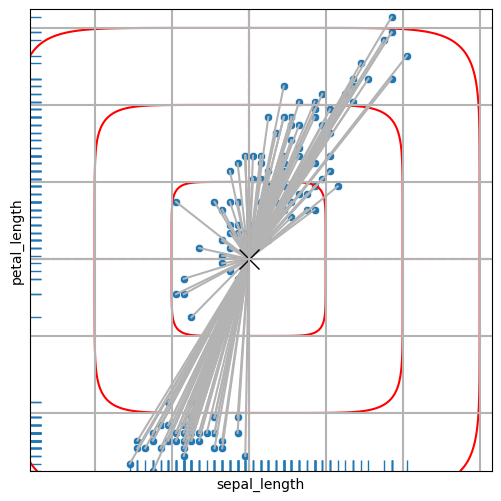

In [8]:
I = np.array([[1, 0],
              [0, 1]])

ZZ1_grid, ZZ2_grid = generate_grid(I, mu_x, mu_y)

x_array = np.array(iris_sns["sepal_length"])
y_array = np.array(iris_sns["petal_length"])

fig, ax = plt.subplots(figsize = (6,6))

plt.plot([x_array, mu_x+x_array*0],
         [y_array, mu_y+y_array*0], 
         color = [0.7,0.7,0.7])

ax = sns.scatterplot(data=iris_sns, x="sepal_length", y="petal_length")
sns.rugplot(data=iris_sns, x="sepal_length", y="petal_length", ax = ax)

plt.axvline(x=mu_x, linestyle = '--', color = 'r')
plt.axhline(y=mu_y, linestyle = '--', color = 'r')

plt.plot(mu_x,mu_y, color = 'k', 
         marker = 'x', markersize = 15)

# ax.set_xlabel('Sepal length, $x_1$ (cm)')
# ax.set_ylabel('Petal length, $x_3$ (cm)')

ax.set_xticks([])
ax.set_yticks([])

plt.plot(ZZ1_grid,ZZ2_grid,color = [0.7,0.7,0.7])
plt.plot(ZZ1_grid.T,ZZ2_grid.T,color = [0.7,0.7,0.7])

ax.axis('scaled')

ax.set_xbound(3,9)

ax.set_ybound(1,7)

# Euclidean distance
p = 8
dd = ((np.abs((xx - mu_x))**p) + (np.abs((yy - mu_y))**p))**(1./p)
ax.contour(xx,yy,dd,levels = [1, 2, 3], colors = 'r')

#%% standardized Euclidean distance


D = np.array([[sigma_x, 0],
              [0, sigma_y]])

ZZ1_grid, ZZ2_grid = generate_grid(D, mu_x, mu_y)

x_array = np.array(iris_sns["sepal_length"])
y_array = np.array(iris_sns["petal_length"])

fig.savefig('Figures/鸢尾花，L8.svg', format='svg')

## L_inf范数

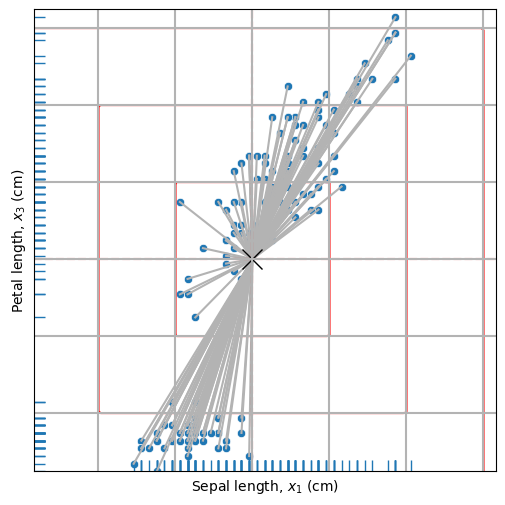

In [9]:
I = np.array([[1, 0],
              [0, 1]])

ZZ1_grid, ZZ2_grid = generate_grid(I, mu_x, mu_y)

x_array = np.array(iris_sns["sepal_length"])
y_array = np.array(iris_sns["petal_length"])

fig, ax = plt.subplots(figsize = (6,6))

plt.plot([x_array, mu_x+x_array*0],
         [y_array, mu_y+y_array*0], 
         color = [0.7,0.7,0.7])

ax = sns.scatterplot(data=iris_sns, x="sepal_length", y="petal_length")
sns.rugplot(data=iris_sns, x="sepal_length", y="petal_length", ax = ax)

plt.axvline(x=mu_x, linestyle = '--', color = 'r')
plt.axhline(y=mu_y, linestyle = '--', color = 'r')

plt.plot(mu_x,mu_y, color = 'k', 
         marker = 'x', markersize = 15)

ax.set_xlabel('Sepal length, $x_1$ (cm)')
ax.set_ylabel('Petal length, $x_3$ (cm)')

plt.plot(ZZ1_grid,ZZ2_grid,color = [0.7,0.7,0.7])
plt.plot(ZZ1_grid.T,ZZ2_grid.T,color = [0.7,0.7,0.7])

ax.axis('scaled')

ax.set_xbound(3,9)

ax.set_ybound(1,7)

# Euclidean distance
p = 8
dd =  np.maximum(np.abs(xx - mu_x),np.abs(yy - mu_y))
ax.contour(xx,yy,dd,levels = [1, 2, 3], colors = 'r')

#%% standardized Euclidean distance


D = np.array([[sigma_x, 0],
              [0, sigma_y]])

ZZ1_grid, ZZ2_grid = generate_grid(D, mu_x, mu_y)

# x_array = np.array(iris_sns["sepal_length"])
# y_array = np.array(iris_sns["petal_length"])

ax.set_xticks([])
ax.set_yticks([])

fig.savefig('Figures/鸢尾花，L_inf.svg', format='svg')

## 标准欧氏距离

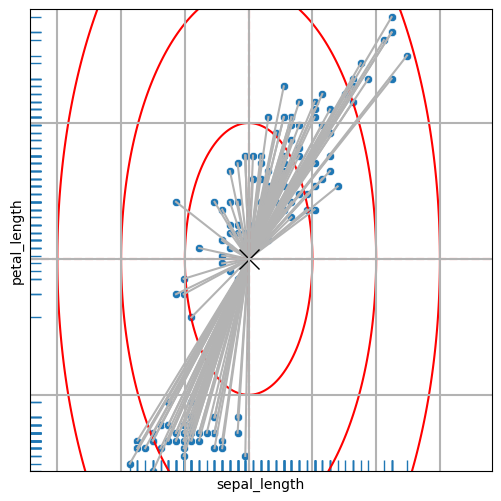

In [10]:
fig, ax = plt.subplots(figsize = (6,6))

plt.plot([x_array, mu_x+x_array*0],
         [y_array, mu_y+y_array*0], 
         color = [0.7,0.7,0.7])

ax = sns.scatterplot(data=iris_sns, x="sepal_length", y="petal_length")
sns.rugplot(data=iris_sns, x="sepal_length", y="petal_length", ax = ax)

plt.axvline(x=mu_x, linestyle = '--', color = 'r')
plt.axhline(y=mu_y, linestyle = '--', color = 'r')

plt.plot(mu_x,mu_y, color = 'k', 
         marker = 'x', markersize = 15)

# ax.set_xlabel('Sepal length, $x_1$ (cm)')
# ax.set_ylabel('Petal length, $x_3$ (cm)')

ax.set_xticks([])
ax.set_yticks([])

plt.plot(ZZ1_grid,ZZ2_grid,color = [0.7,0.7,0.7])
plt.plot(ZZ1_grid.T,ZZ2_grid.T,color = [0.7,0.7,0.7])

ax.axis('scaled')

ax.set_xbound(3,9)

ax.set_ybound(1,7)

# Euclidean distance
dd = np.sqrt(((xx - mu_x)/sigma_x)**2 + ((yy - mu_y)/sigma_y)**2)
ax.contour(xx,yy,dd,levels = [1, 2, 3], colors = 'r')

fig.savefig('Figures/鸢尾花，标准欧氏.svg', format='svg')

## 马氏距离

In [11]:
lambdas, V = LA.eig(SIGMA_13)

zz_maha = np.c_[xx.ravel(), yy.ravel()]

X = iris_sns.to_numpy()

X13 = np.array(X[:,[0,2]], dtype=float)
emp_cov_Xc = EmpiricalCovariance().fit(X13)

mahal_sq_Xc = emp_cov_Xc.mahalanobis(zz_maha)

mahal_sq_Xc = mahal_sq_Xc.reshape(xx.shape)
mahal_d_Xc = np.sqrt(mahal_sq_Xc)


ZZ1_grid, ZZ2_grid = generate_grid(V@np.diag(np.sqrt(lambdas)), mu_x, mu_y)

x_array = np.array(iris_sns["sepal_length"])
y_array = np.array(iris_sns["petal_length"])

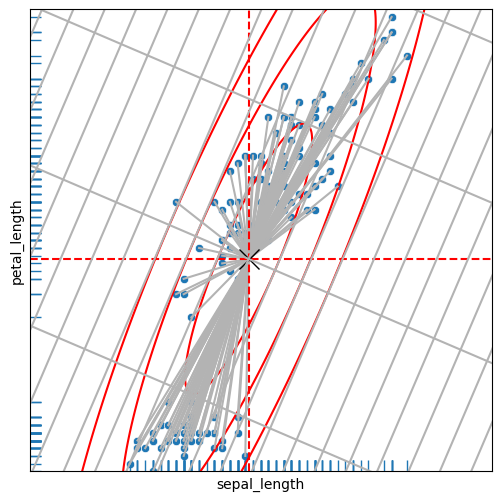

In [12]:
fig, ax = plt.subplots(figsize = (6,6))

plt.plot([x_array, mu_x+x_array*0],
         [y_array, mu_y+y_array*0], 
         color = [0.7,0.7,0.7])

ax = sns.scatterplot(data=iris_sns, x="sepal_length", y="petal_length")
sns.rugplot(data=iris_sns, x="sepal_length", y="petal_length", ax = ax)

plt.axvline(x=mu_x, linestyle = '--', color = 'r')
plt.axhline(y=mu_y, linestyle = '--', color = 'r')

plt.plot(mu_x,mu_y, color = 'k', 
         marker = 'x', markersize = 15)

# ax.set_xlabel('Sepal length, $x_1$ (cm)')
# ax.set_ylabel('Petal length, $x_3$ (cm)')

ax.set_xticks([])
ax.set_yticks([])

plt.plot(ZZ1_grid,ZZ2_grid,color = [0.7,0.7,0.7])
plt.plot(ZZ1_grid.T,ZZ2_grid.T,color = [0.7,0.7,0.7])

ax.axis('scaled')

ax.set_xbound(3,9)

ax.set_ybound(1,7)

ax.contour(xx,yy,mahal_d_Xc,levels = [1, 2, 3], colors = 'r')

fig.savefig('Figures/鸢尾花，马氏.svg', format='svg')